<h3>Libraries</h3>

In [25]:
from converter import separator
from quadraticError import degreeChoice
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import operator
import csv

In [26]:
#1. Obtención del conjunto de datos
x,y = [], []
with open("../libs/x.csv", mode="r") as fx:
    x_raw = csv.reader(fx, delimiter=',', quotechar='"')
    for i in x_raw:
        if i != '\n':
            try:
                x.append(float(i[0]))
            except:
                print(type(i))
with open("../libs/y.csv", mode="r") as fy:
    y_raw = csv.reader(fy, delimiter=',', quotechar='"')
    for i in y_raw:
        if i != '\n':
            try:
                y.append(float(i[0]))
            except:
                print(type(i))
x = np.array(x)
y = np.array(y)
print(x, y)

[ 0.          9.69728558  9.7935623  10.821197   10.28808714 12.90854701
 11.52207545 10.24335003 10.88772647 10.66734865 12.98815815  9.58968347
 10.6261354   8.29180852  4.89402037 11.30723719 11.7288724   8.51566996
 14.53950925  7.09126865 10.09151703  9.6256323  13.06555843 12.93871754
 10.30989485 10.75632504  8.2244285   6.03840706  9.3041757  10.31269794
 12.46058136 12.4047597   9.22534637  9.3953945   7.90289407  7.15996413
  6.58745962 13.90155079  8.98069564  9.1238514   7.49440928 11.55498071
  6.7722043   9.57451944  8.20906688 10.773805    8.97838972  7.63873563
  9.94363554 10.85666374 10.13303444 10.6049438   8.73135581  9.27451767
  8.6550791   9.28089368  8.37370744  6.5474348  10.35485228  9.19643813
  6.73960331 10.92556451  8.18540327 10.10389079 11.45818112 10.25796582
 12.27880137  7.53034836 10.80468328  8.63037982  8.2584057   8.84230067
  9.37689494 10.11233068  7.66970032 11.80165297 10.93132488  6.92751263
 12.97650439 13.79177835 12.35755914  9.64015033  7

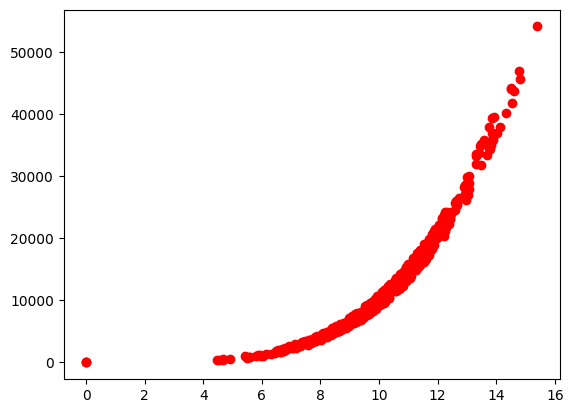

In [27]:
#2. Visualización inicial de los datos
plt.plot( x, y, 'ro')
plt.savefig('punto1.png')
plt.show()

In [28]:
#3. Preparación de los datos
x= x[:, np.newaxis]
y= y[:, np.newaxis]

model1 = LinearRegression()
model1.fit(x,y)

LinearRegression()

In [29]:
#4. Primera prueba (aplicar un modelo de regresión lineal con sklearn)
y_predict = model1.predict(x)

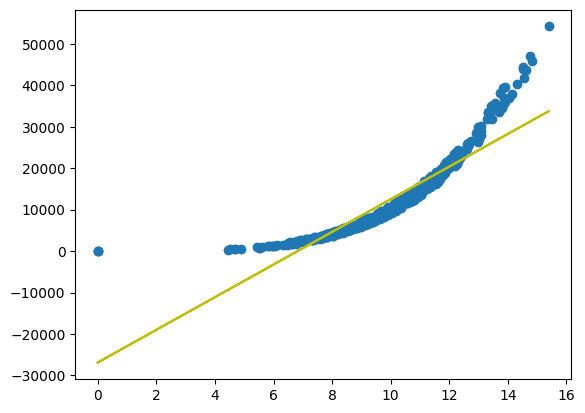

In [30]:
#5. Graficar la regresión obtenida con los datos obtenidos
plt.scatter(x, y)
plt.plot(x, y_predict, color='y')
plt.savefig('punto2.png')
plt.show()

<h3>Lectura y resumen del proceso de regresión polinomial, así como partes más influyentes.</h3>
<p>La regresión polinomial es una técnica utilizada en el análisis de datos para modelar una relación no lineal entre una variable independiente (X) y una variable dependiente (Y). A diferencia de la regresión lineal, que asume una relación lineal entre las variables, la regresión polinómica puede capturar patrones más complejos.

El proceso de regresión polinomial implica los siguientes pasos:
</p>
<ul>
    <li>Recopilar los datos: se deben recopilar los datos de las variables X e Y de la muestra que se quiere analizar.</li>
    <li>Elegir el grado del polinomio: se debe decidir el grado del polinomio que se va a utilizar para modelar la relación entre X e Y. El grado del polinomio se refiere al número de términos polinómicos utilizados en el modelo.</li>
    <li>Ajustar el modelo: se ajusta el modelo de regresión polinomial utilizando los datos de la muestra y el grado del polinomio seleccionado. El ajuste del modelo se realiza mediante un método de mínimos cuadrados, que busca minimizar la diferencia entre los valores predichos y los valores observados.</li>
    <li>Evaluar el modelo: una vez ajustado el modelo, se debe evaluar su calidad. Para ello se utilizan medidas como el coeficiente de determinación (R²) y el error cuadrático medio (MSE).</li>
    <li>Utilizar el modelo: una vez validado el modelo, se puede utilizar para hacer predicciones sobre valores futuros de la variable dependiente Y en función de los valores de la variable independiente X.</li>
</ul>
<p>La regresión polinomial es un método útil para modelar relaciones no lineales entre variables. Sin embargo, es importante tener en cuenta que el grado del polinomio se debe considerar cuidadosamente para llegar a un sobreajuste o subajuste del modelo.</p>

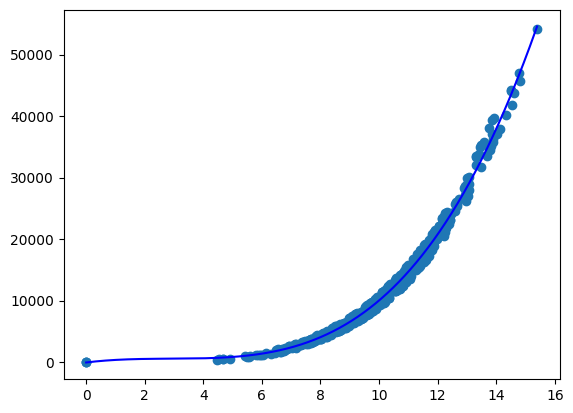

In [31]:
#6. Regresión Polinomial
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly,y)

x_range = np.linspace(np.min(x), np.max(x), 1000)

x_range_poly = polynomial_features.transform(x_range.reshape(-1, 1))
y_range_predict = model.predict(x_range_poly)

plt.scatter(x, y)
plt.plot(x_range, y_range_predict, color='b')
plt.savefig('punto6.png')
plt.show()

61.321097002398


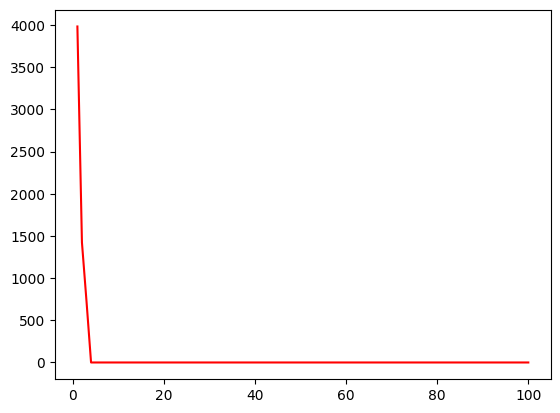

In [32]:
#7. Ajuste excesivo e insuficiente
def printQE(degree):
    rmselist = np.zeros(100)
    x_p_list = [None]*100
    y_poly_pred_P_list=[None]*100

    for i in np.arange(1, degree):
        rmselist[i-1] ,x_p_list[i-1],y_poly_pred_P_list[i-1]= degreeChoice(x,y,i)

    print(np.mean(rmselist))

    plt.plot(np.arange(1, 101), rmselist, color='r')
    plt.savefig(f"degree{degree}.png")
    plt.show()
printQE(4)

<h3>¿Qué se observa y que se puede concluir?</h3>
<p>Obteniendo el promedio del error cuadratico el resultado es un valor cercano al cero, por lo que se puede decir que la linea creada por el modelo de regresión polinomica es bastante acorde a los datos ya existentes.

Ahora viendo la gráfica se puede hacer una interpretación similar, ya que el la zona donde aumenta el valor del error cuadrático es bastante pequeña.</p>

61.321097002398


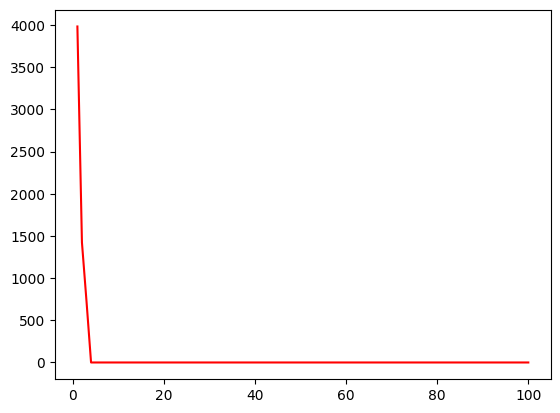

In [33]:
#8. Visualización de las regresiones lineales, grado 2, 4, 16, 32 y 64
printQE(4)

90.0346606507925


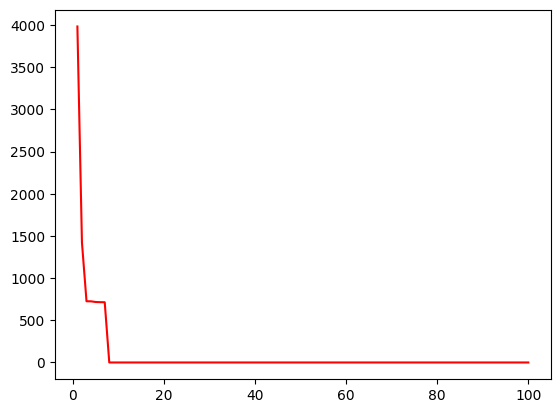

In [34]:
printQE(8)

146.7234980253158


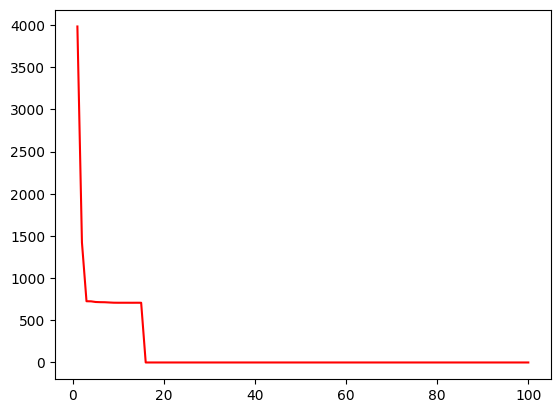

In [35]:
printQE(16)

283.7943016111418


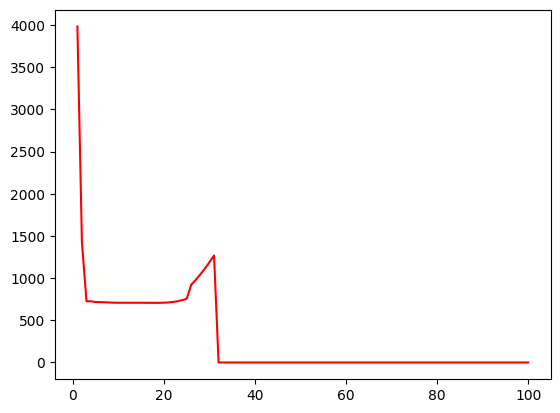

In [36]:
printQE(32)

1380.3381963255306


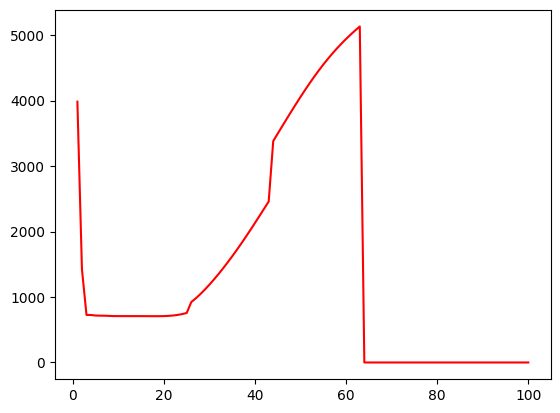

In [37]:
printQE(64)